In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ATLAS = "AAL+CSF"
workdir = "../braintypicality/workdir/cuda_opt/learnable"
region_scores_raw = pd.read_csv(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_likelihoods_abcd_ibis_conte.csv")


In [3]:
import os, datetime
from pathlib import Path

def print_file_date(path):
    # 1. Creation time (on Windows it’s real birth time; on Linux often metadata-change time)
    ctime = os.path.getctime(path)
    # 2. Last modification time
    mtime = os.path.getmtime(path)

    print("Created:      ", datetime.datetime.fromtimestamp(ctime))
    print("Last modified:", datetime.datetime.fromtimestamp(mtime))


    # ——— OR using pathlib for more control ———

    p = Path(path)
    st = p.stat()
    birth = getattr(st, 'st_birthtime', st.st_ctime)  # use real birthtime if available
    mod   = st.st_mtime

    print("Created:      ", datetime.datetime.fromtimestamp(birth))
    print("Last modified:", datetime.datetime.fromtimestamp(mod))

In [4]:
print_file_date(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_likelihoods_abcd_ibis_conte.csv")

Created:       2025-05-27 16:34:01.439830
Last modified: 2025-05-27 16:34:01.438830
Created:       2025-05-27 16:34:01.439830
Last modified: 2025-05-27 16:34:01.438830


In [5]:
print_file_date(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_likelihoods.csv")

Created:       2025-05-27 16:34:01.299832
Last modified: 2025-05-27 16:34:01.286833
Created:       2025-05-27 16:34:01.299832
Last modified: 2025-05-27 16:34:01.286833


In [6]:
region_scores_raw_2 = pd.read_csv(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_likelihoods.csv")

In [7]:
region_scores_raw["Cohort"].value_counts()

Cohort
CONTE              444
ABCD-Val-Test      330
ABCD-ASD           161
IBIS-HR-Typical    106
IBIS-LR-Typical     82
IBIS-ASD            65
IBIS-Atypical       38
IBIS-DS             28
Name: count, dtype: int64

In [8]:
region_scores_raw_2["Cohort"].value_counts()

Cohort
IBIS-HR-Typical    106
IBIS-LR-Typical     82
IBIS-ASD            65
IBIS-Atypical       38
IBIS-DS             28
Name: count, dtype: int64

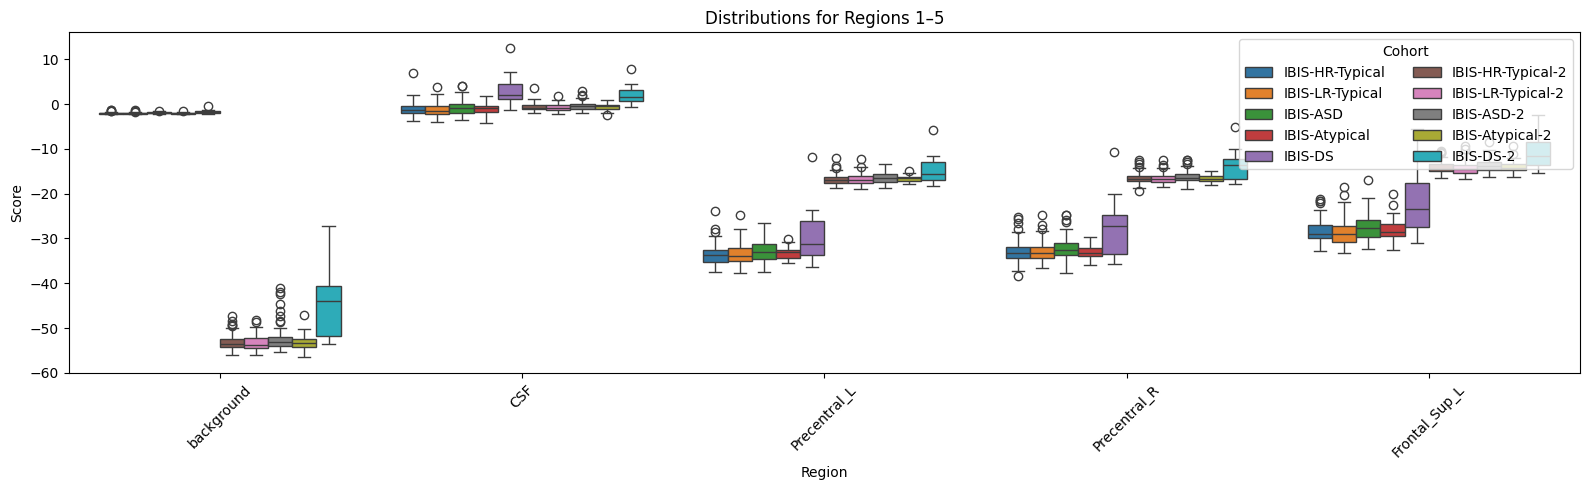

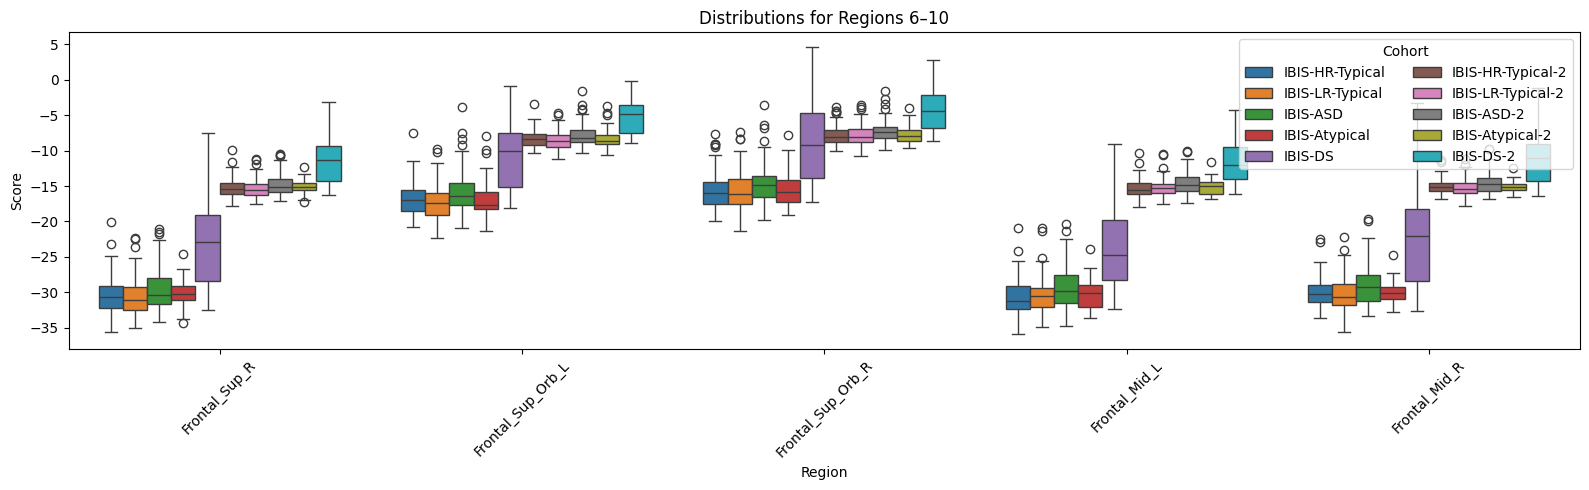

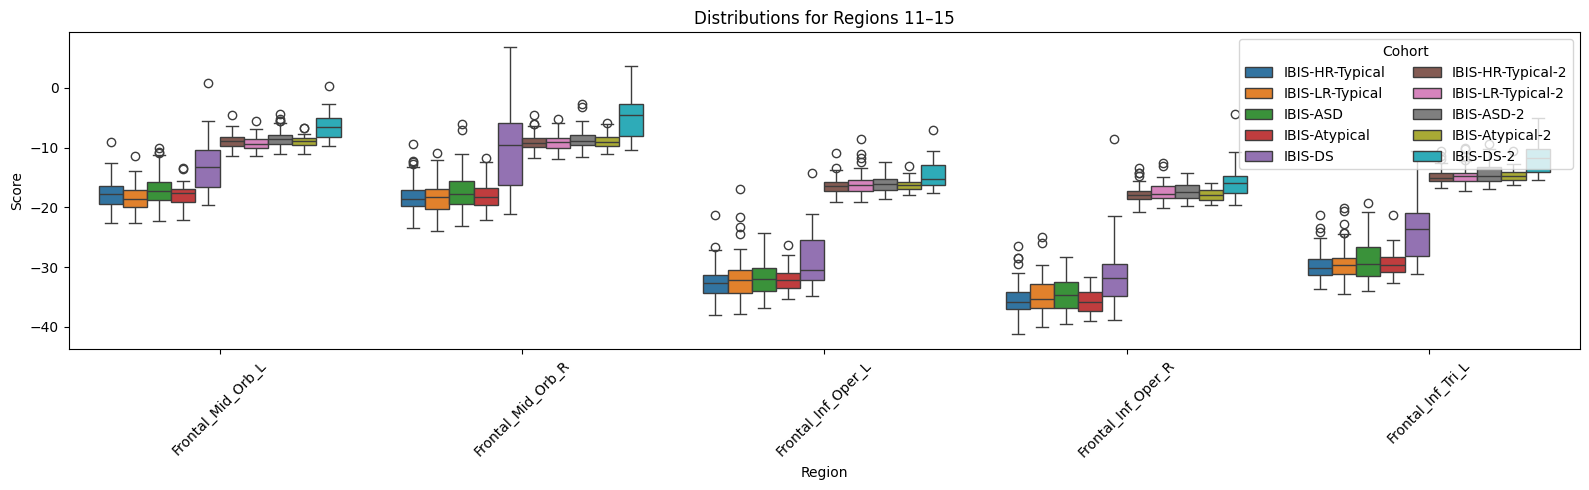

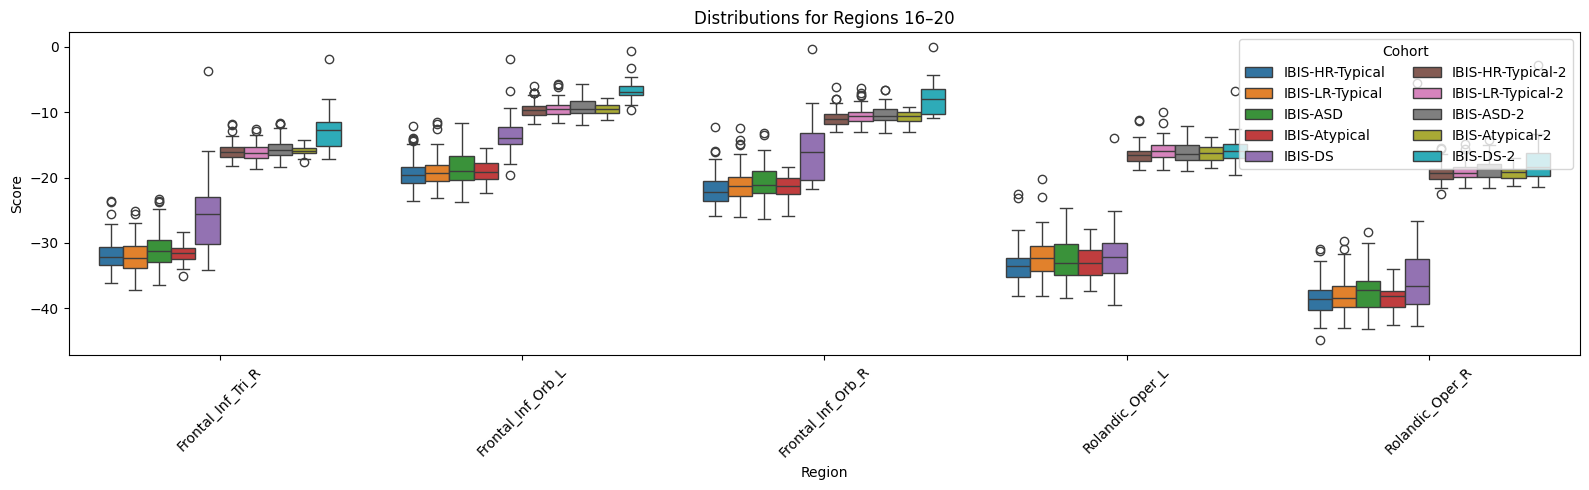

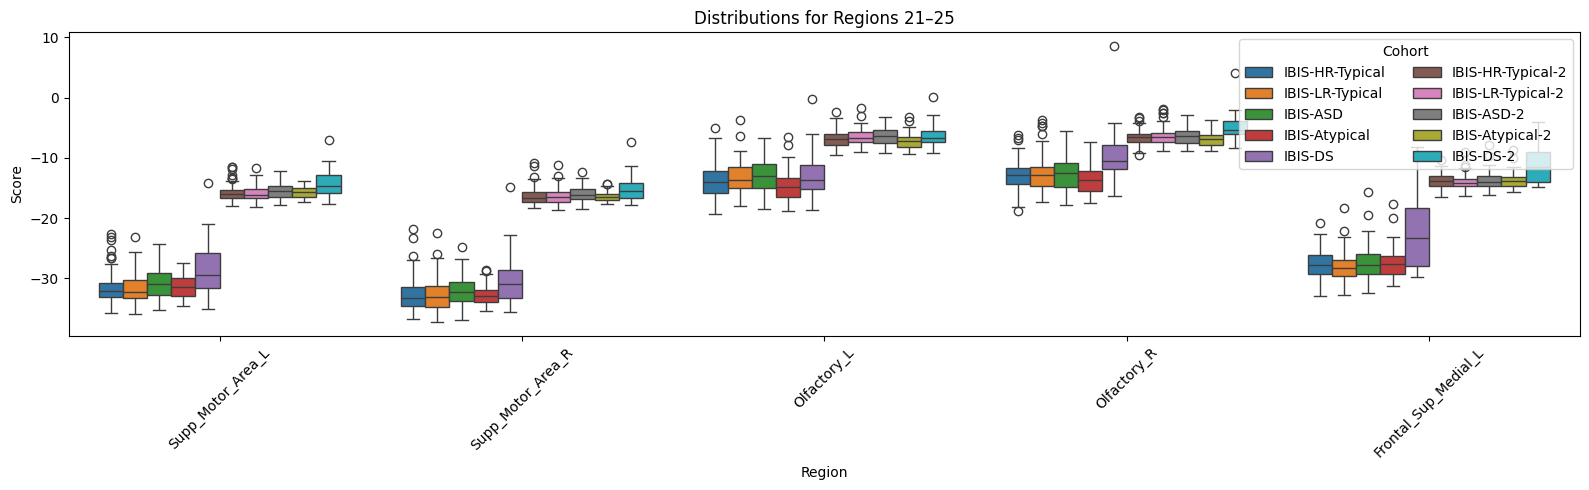

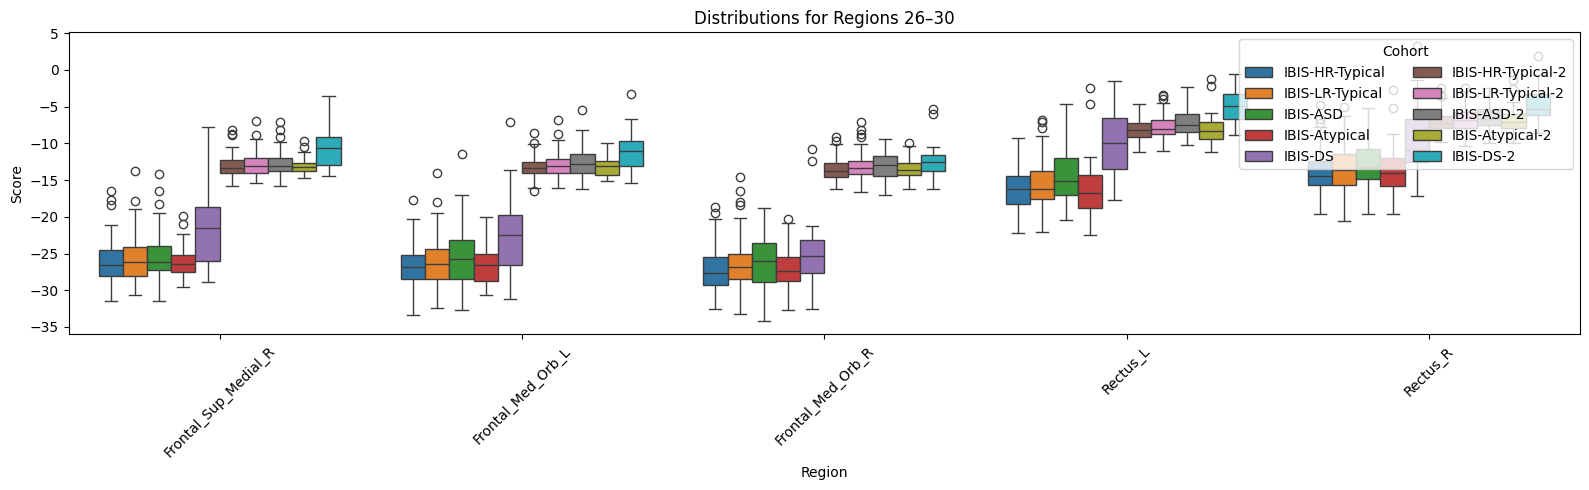

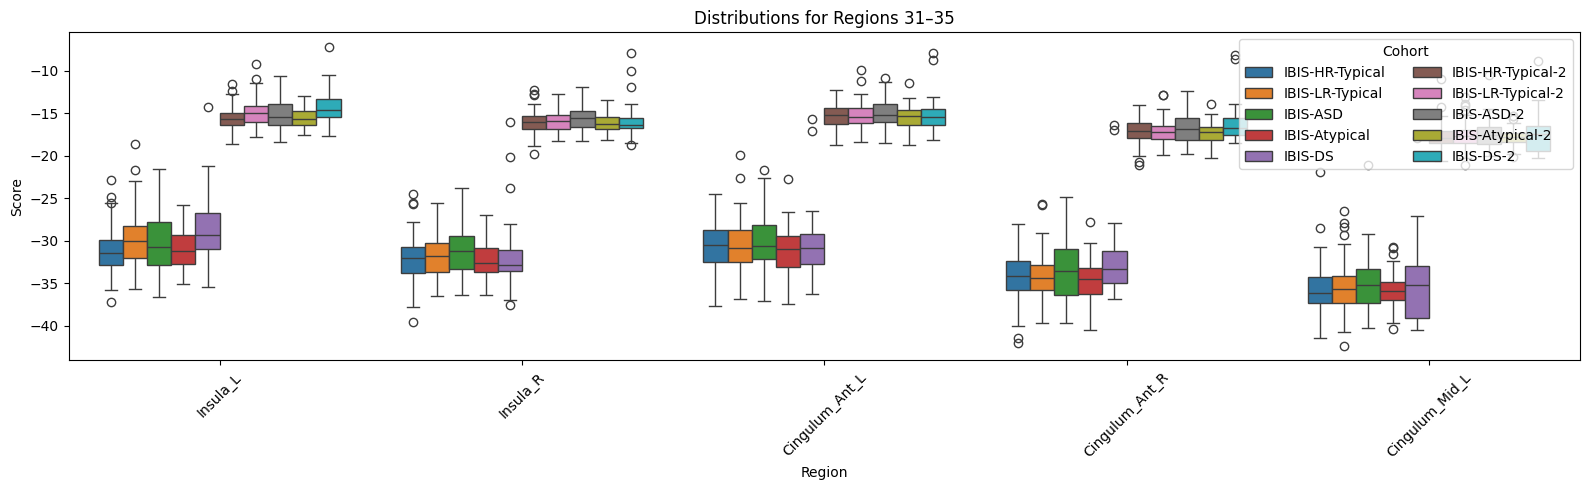

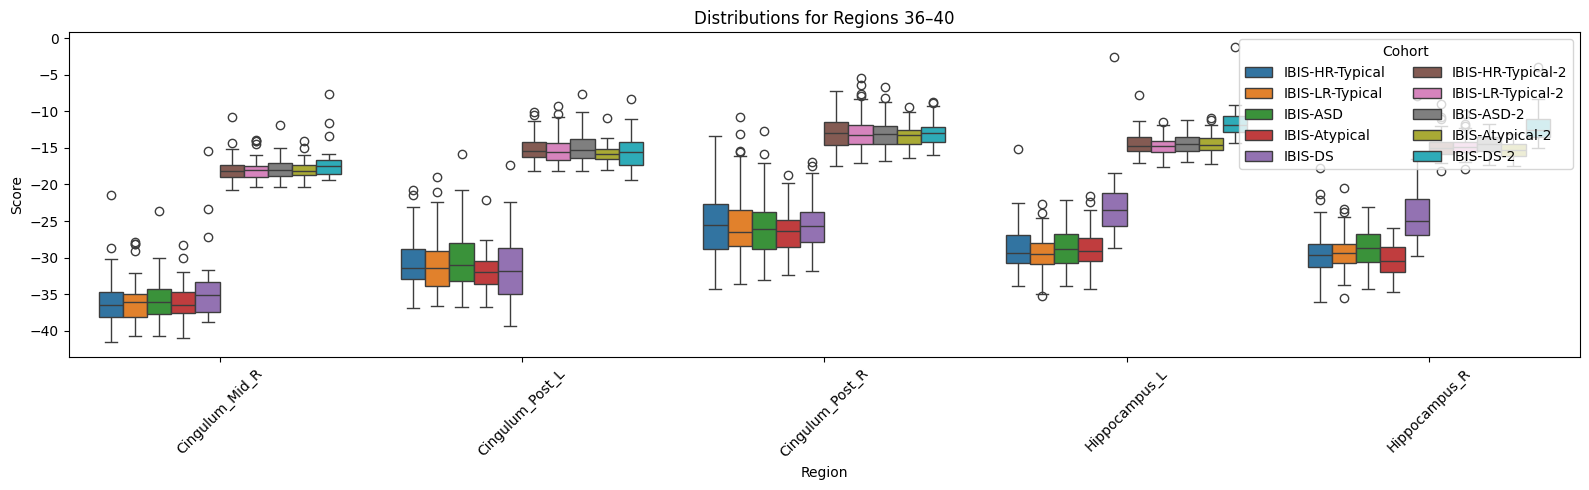

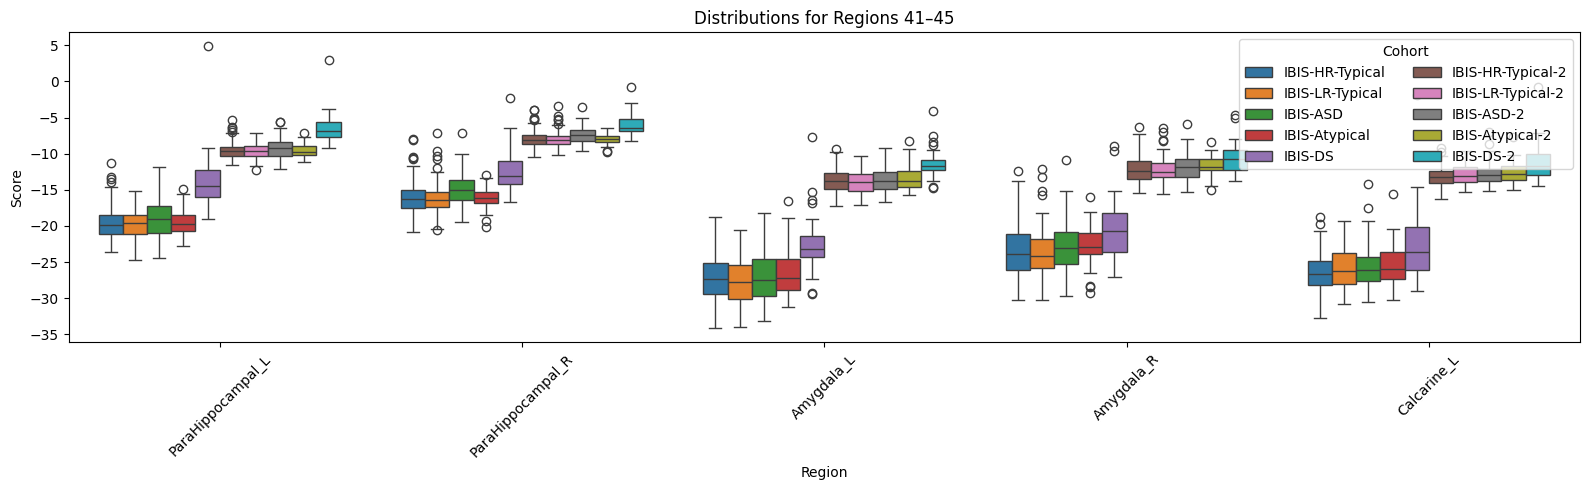

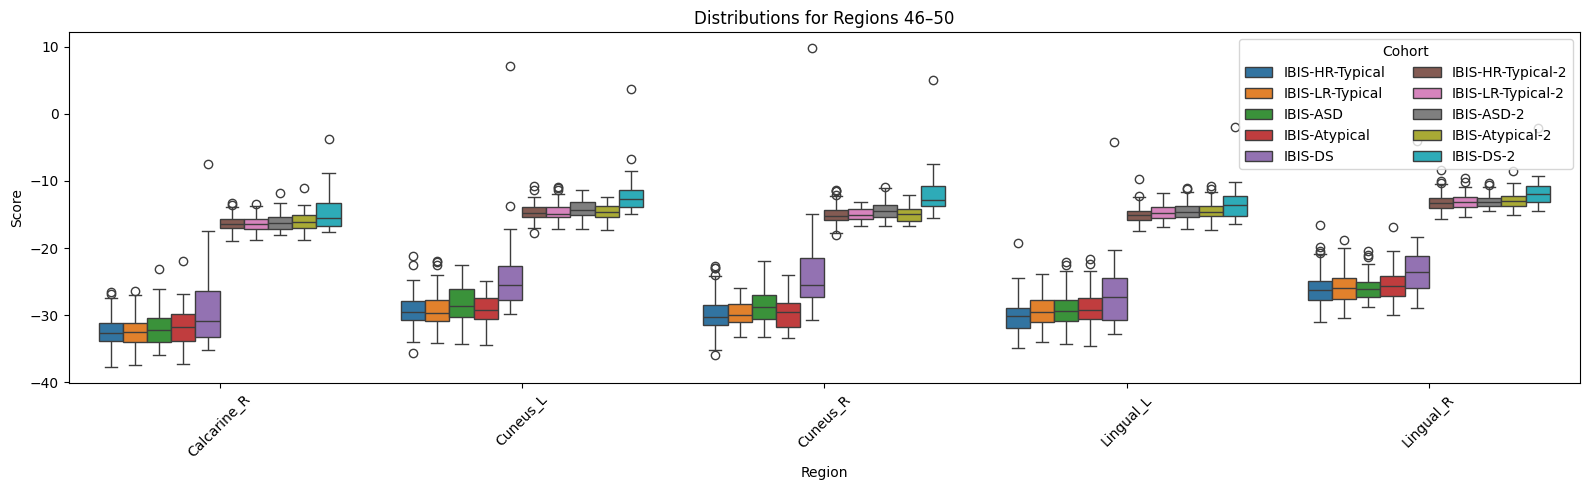

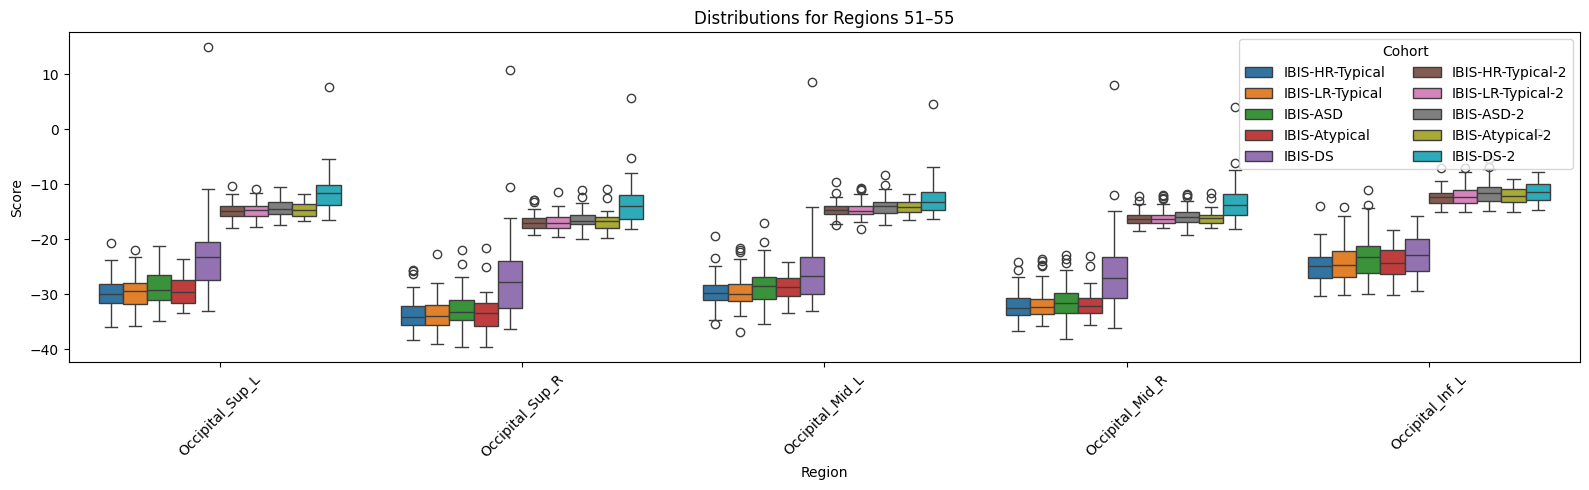

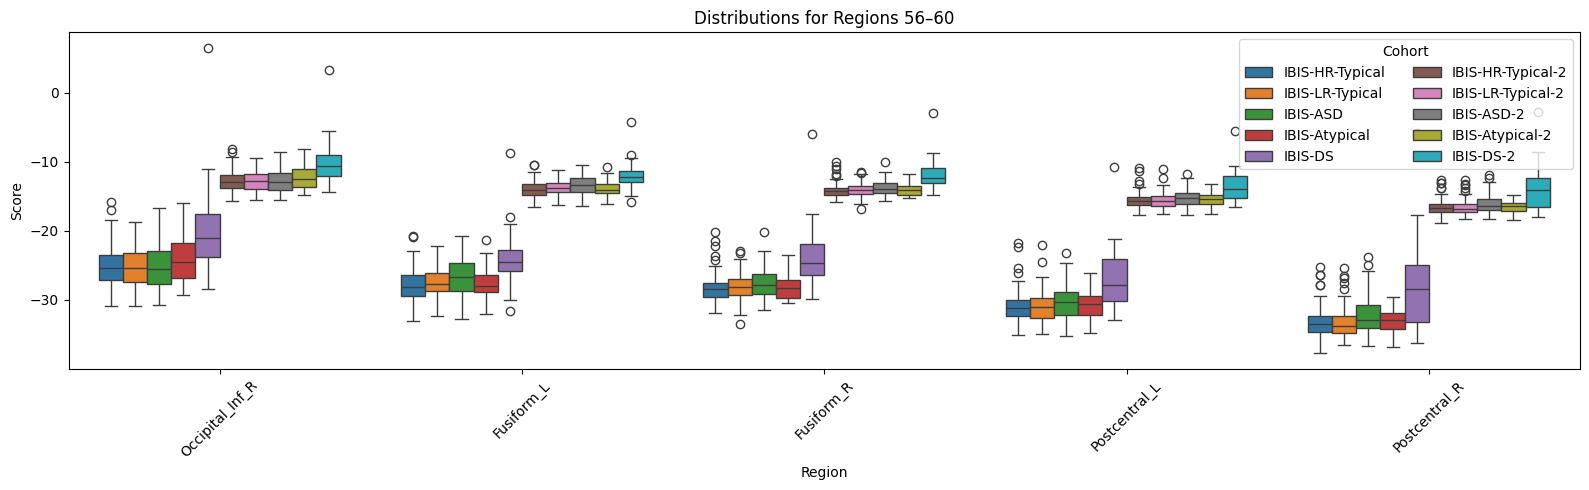

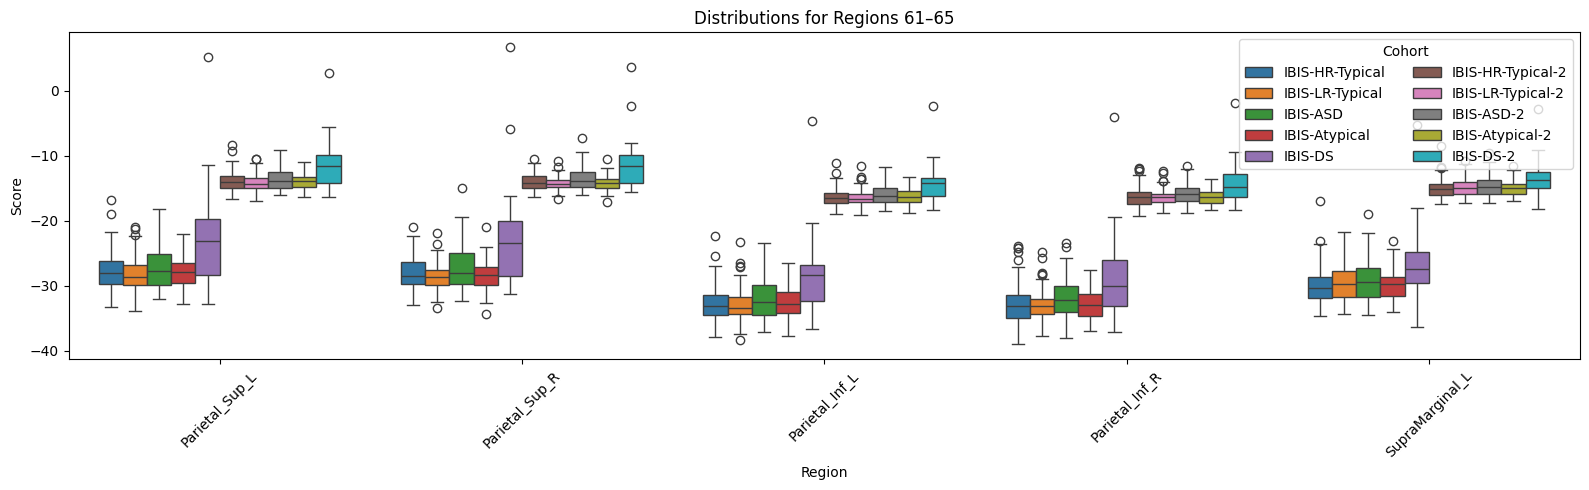

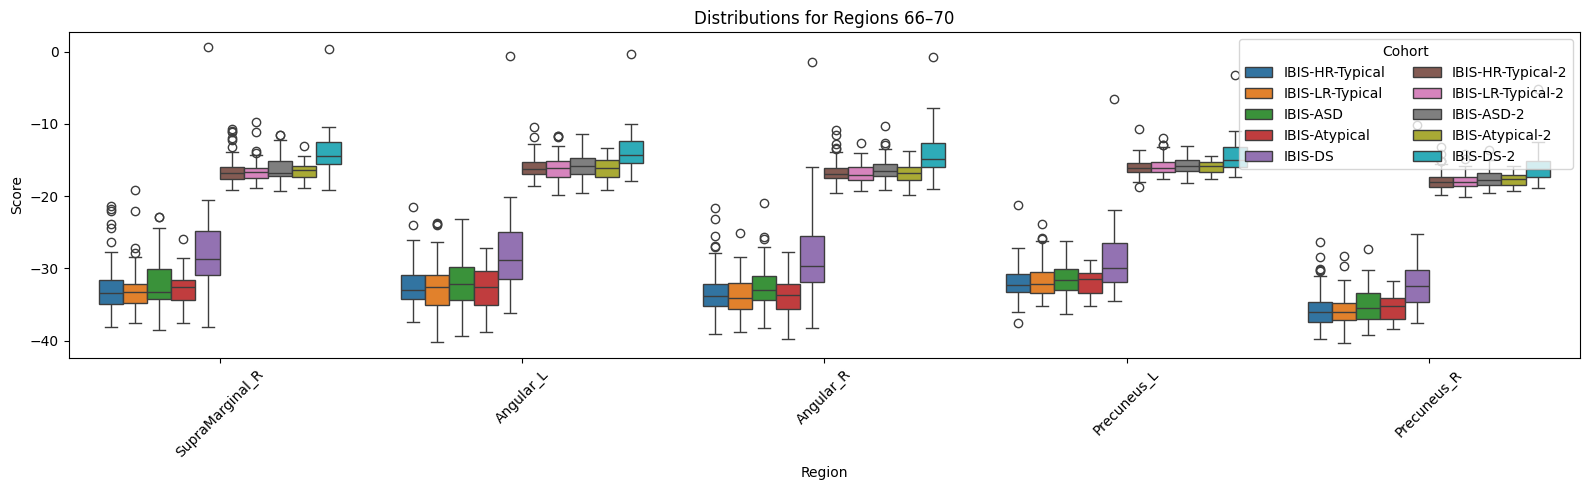

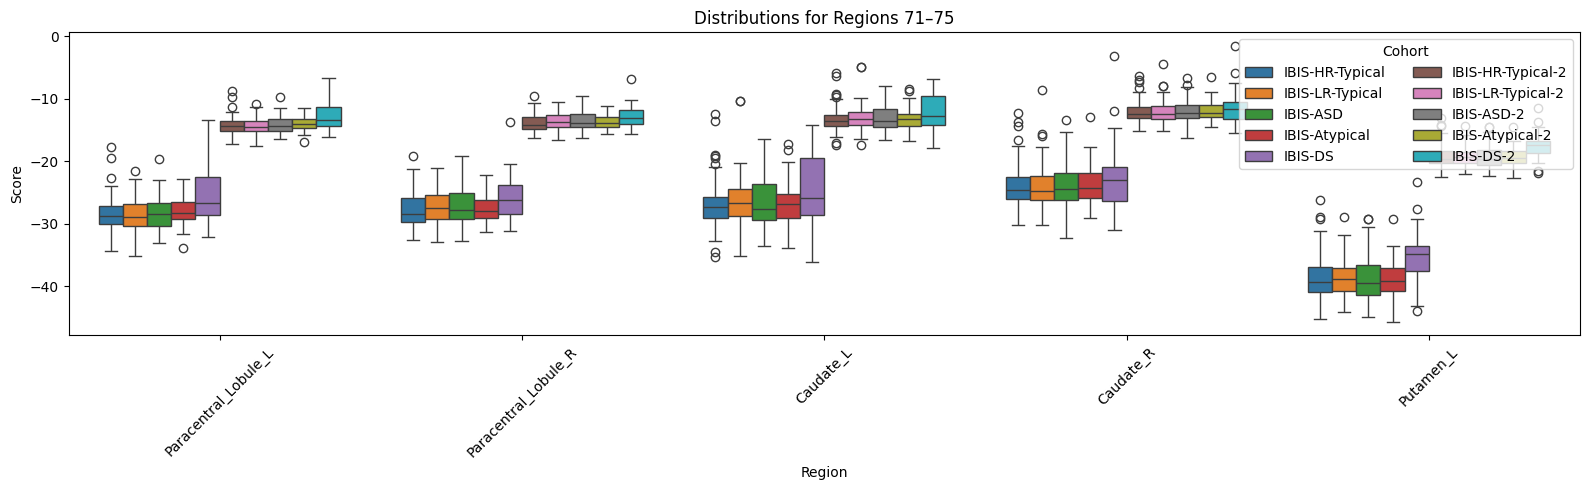

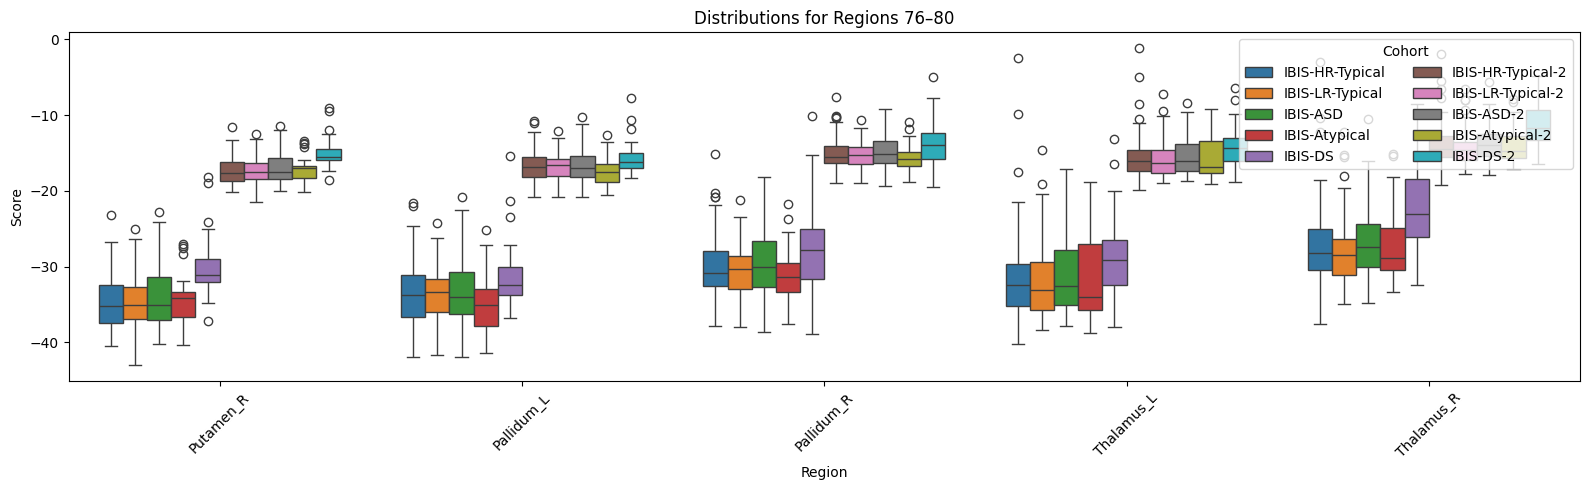

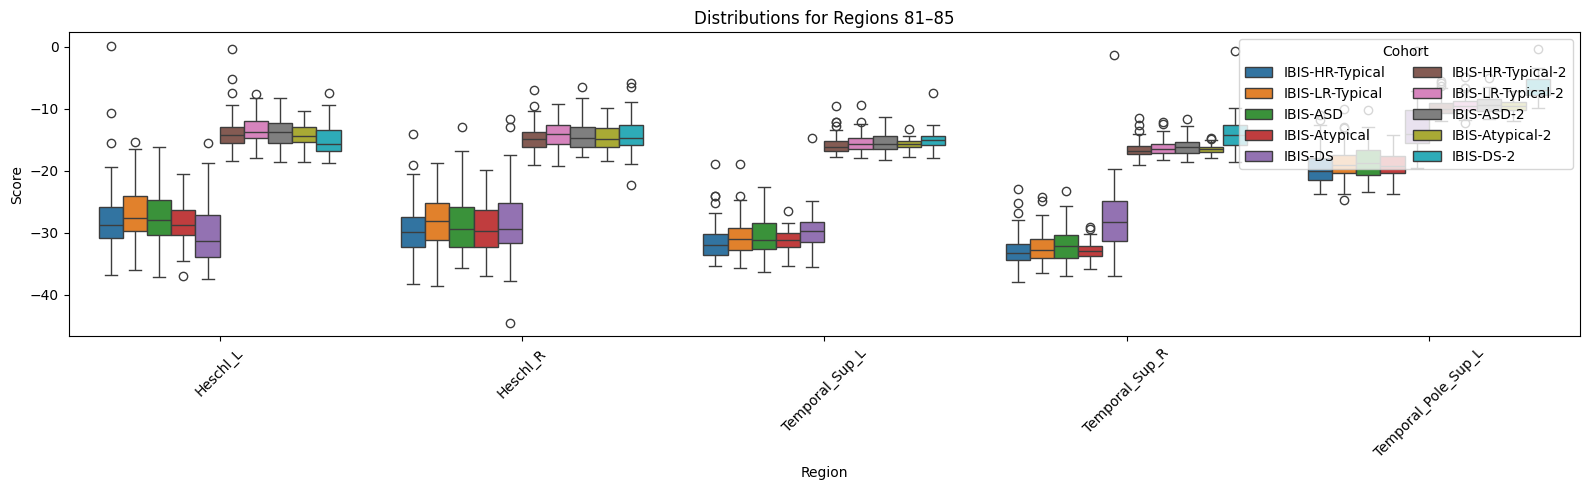

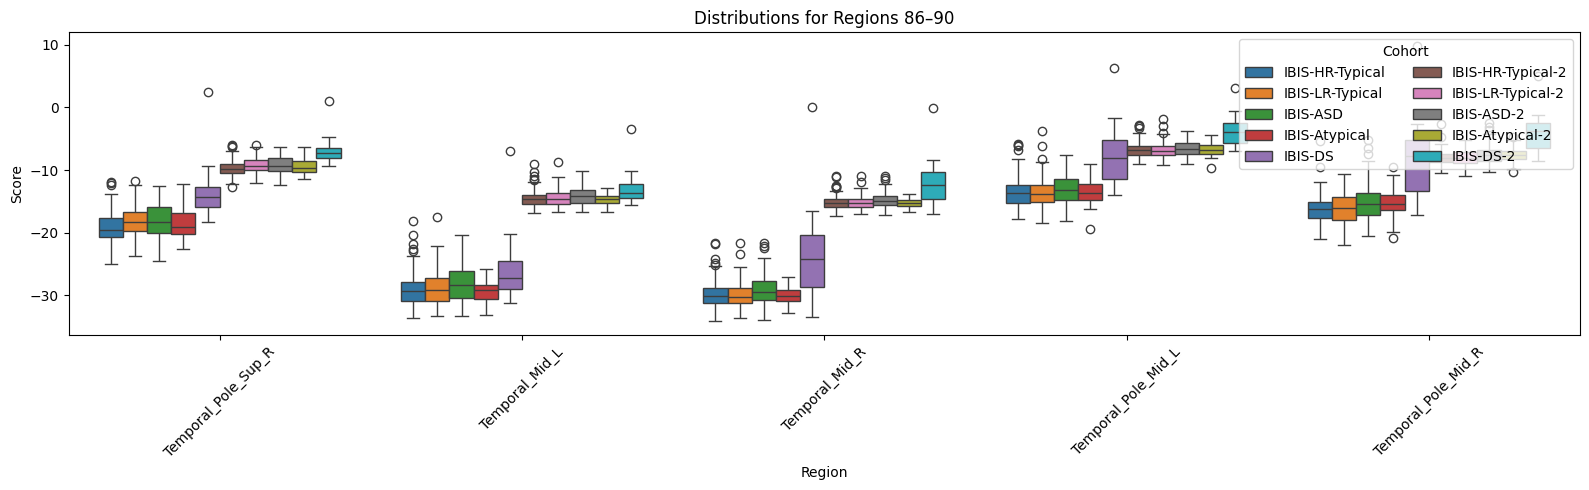

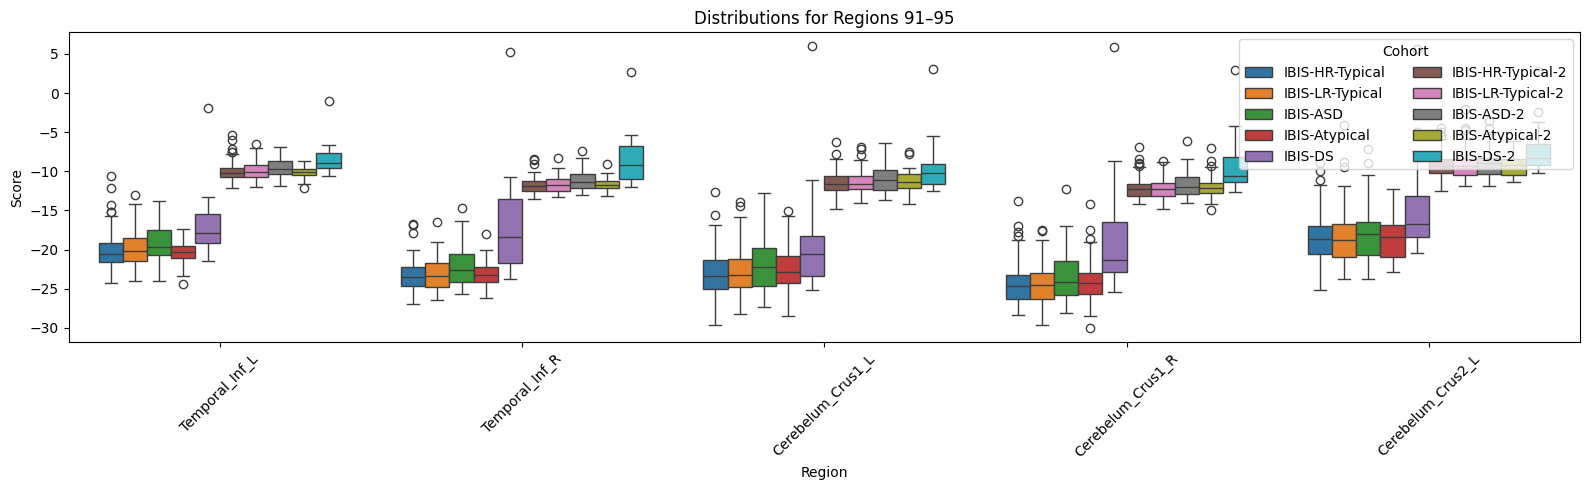

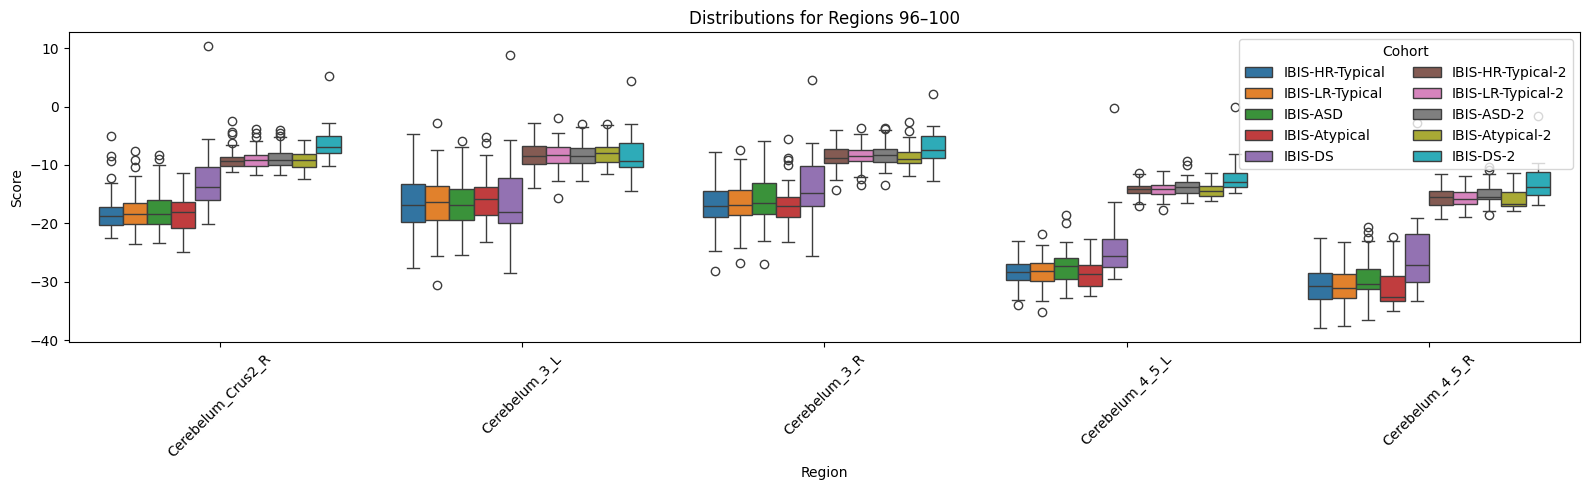

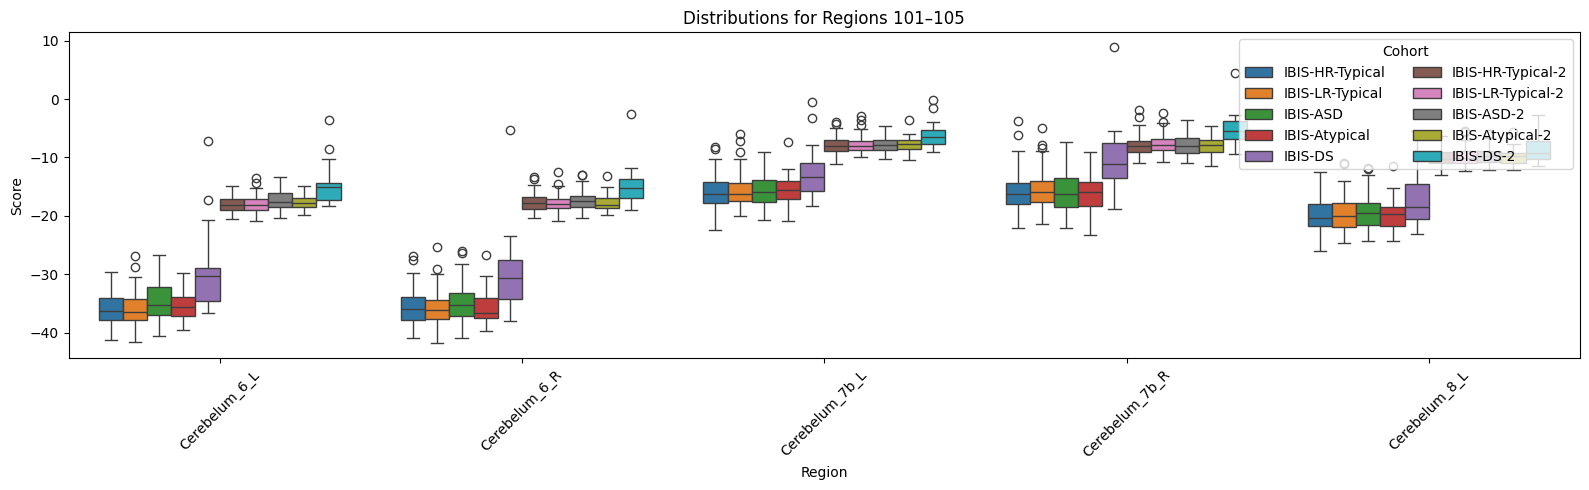

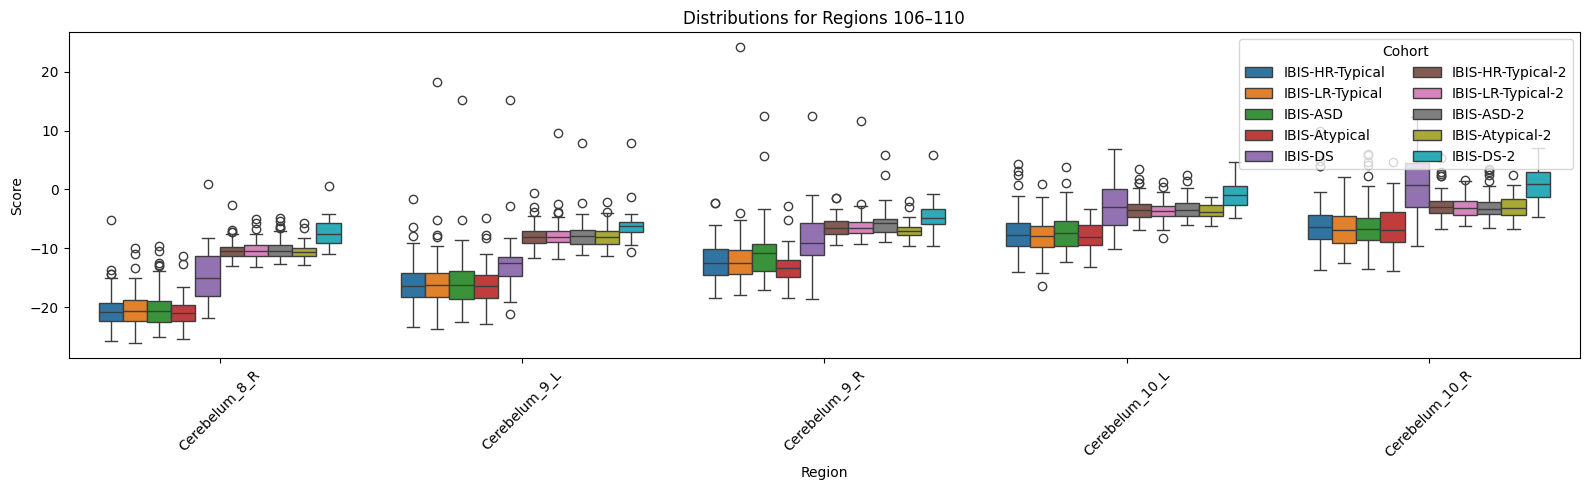

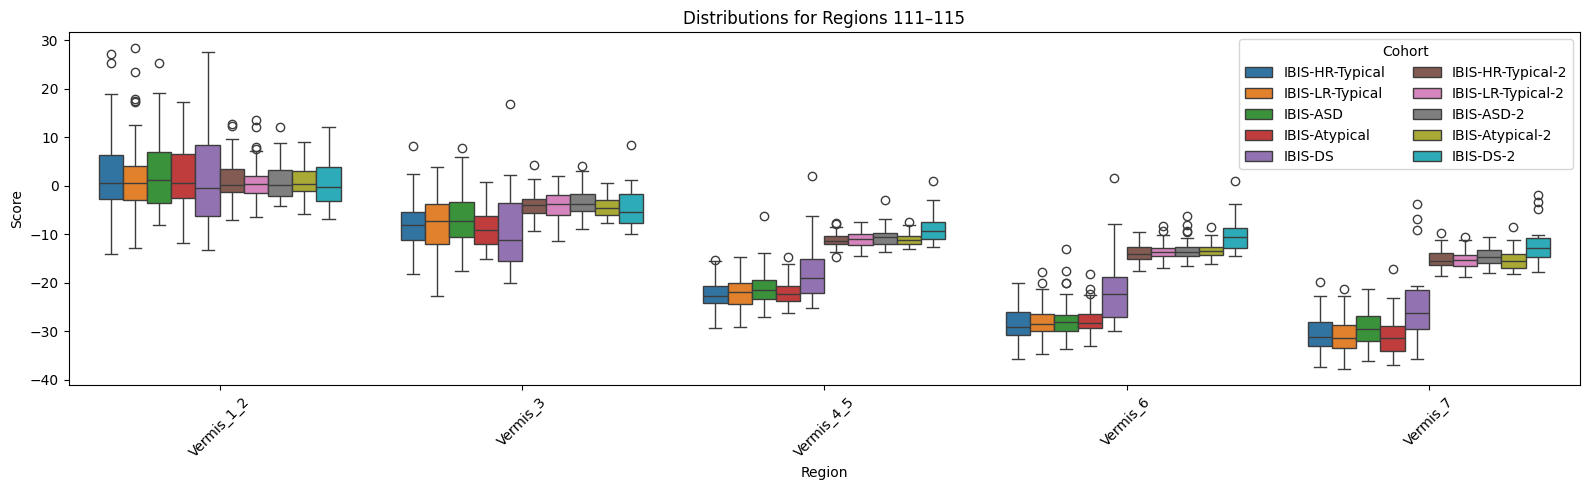

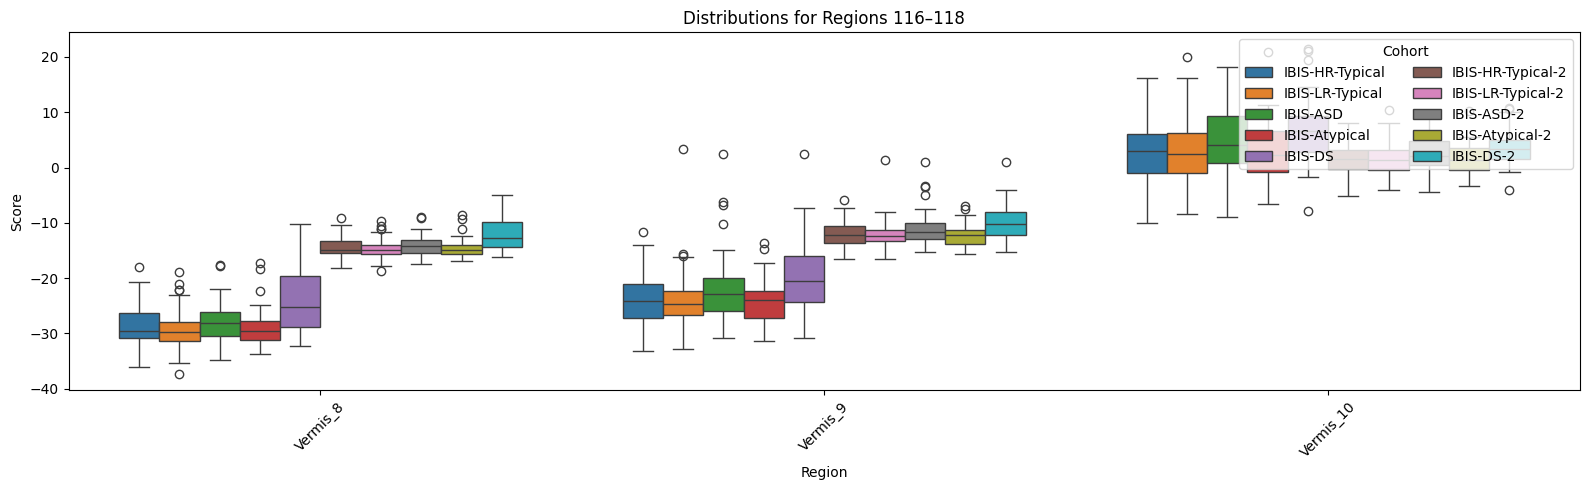

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the cohorts you care about and their “-2” variants
cohorts    = ['IBIS-HR-Typical', 'IBIS-LR-Typical', 'IBIS-ASD', 'IBIS-Atypical', 'IBIS-DS']
cohorts2   = [c + '-2' for c in cohorts]
all_cohorts = cohorts + cohorts2

# 2. Prepare DataFrames: filter to only those cohorts & add “-2” suffix on the second
df1 = region_scores_raw[region_scores_raw['Cohort'].isin(cohorts)].copy()
df2 = region_scores_raw_2[region_scores_raw_2['Cohort'].isin(cohorts)].copy()
df2['Cohort'] = df2['Cohort'] + '-2'

# 3. Combine into one long DataFrame
combined = pd.concat([df1, df2], ignore_index=True)

# 4. Identify your region columns, then chunk into fives
region_cols = [c for c in combined.columns if c not in ('Cohort','ID')]
chunks = [region_cols[i:i+5] for i in range(0, len(region_cols), 5)]

# 5. Build a 10‐color palette (5 cohorts × 2 versions)
palette = dict(zip(
    all_cohorts,
    sns.color_palette("tab10", n_colors=len(all_cohorts))
))

# 6. Loop over each 5‐region chunk and plot one boxplot per chunk
for idx, regs in enumerate(chunks, start=1):
    # melt only the needed columns
    plot_df = combined[['Cohort'] + regs].melt(
        id_vars='Cohort',
        var_name='Region',
        value_name='Score'
    )

    fig, ax = plt.subplots(figsize=(16, 5))
    sns.boxplot(
        data=plot_df,
        x='Region', y='Score',
        hue='Cohort',
        hue_order=all_cohorts,
        palette=palette,
        ax=ax
    )
    ax.set_title(f'Distributions for Regions {idx*5-4}–{min(idx*5, len(region_cols))}')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper right', ncol=2, title='Cohort')
    plt.tight_layout()
    plt.show()